   # Analysis
   
   ---
   
  ## Drawing Insights
  
  For this we will be using NLTK and Wordclouds to derive the popular opinions from BA
  customer reviews
  
  ## Visual representation of insights
  Bar graphs, charts and Word cloud images have been generated using matplotlib to visualise these findings
  
  
  

In [1]:
# Importing libraries
import nltk
#nltk.download('vader_lexicon')
#nltk.download('stopwords')
from nltk.sentiment import vader
#Alternatively you can run nltk.download() to install the full nltk data packages
import matplotlib.pyplot as plt
import requests
from collections import Counter
import pandas as pd

In [2]:
# Read in the reviews data into a dataframe
sentiment_analysis_df = pd.read_csv(r"C:\Users\HP\Documents\Projects\British_airways\data\BA_reviews.csv")
sentiment_analysis_df



,reviews
0,BA 242 on the 6/2/23. Boarding was delayed due...
1,"Not only my first flight in 17 years, but also..."
2,My husband and myself were flying to Madrid on...
3,Organised boarding process. Really friendly cr...
4,Outward journey BA245 London to Buenos Aires C...
...,...
995,Madrid to London. Credit where it's due. Flew ...
996,Venice to Gatwick. I use Snokart luggage which...
997,First 3 legs were trouble free. Lounges were g...
998,Flew London to Budapest with British Airways. ...


In [3]:
#create an instance of SentimentIntensityAnalyzer
sentiment_analyzer = vader.SentimentIntensityAnalyzer()

# add a 'sentiment' column
sentiment_analysis_df['sentiment'] = sentiment_analysis_df['reviews'].apply(
    lambda review: sentiment_analyzer.polarity_scores(review)['compound']
    )
sentiment_analysis_df

,reviews,sentiment
0,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564
1,"Not only my first flight in 17 years, but also...",0.9930
2,My husband and myself were flying to Madrid on...,0.9933
3,Organised boarding process. Really friendly cr...,0.9371
4,Outward journey BA245 London to Buenos Aires C...,-0.0980
...,...,...
995,Madrid to London. Credit where it's due. Flew ...,0.9423
996,Venice to Gatwick. I use Snokart luggage which...,-0.8220
997,First 3 legs were trouble free. Lounges were g...,0.7803
998,Flew London to Budapest with British Airways. ...,0.2382


In [4]:
# Add new column 'sentiment_type' to potray the type of sentiment for the scores/values in the 'sentiment' column
sentiment_analysis_df['sentiment_type'] = sentiment_analysis_df['sentiment'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )
sentiment_analysis_df

,reviews,sentiment,sentiment_type
0,BA 242 on the 6/2/23. Boarding was delayed due...,0.9564,positive
1,"Not only my first flight in 17 years, but also...",0.9930,positive
2,My husband and myself were flying to Madrid on...,0.9933,positive
3,Organised boarding process. Really friendly cr...,0.9371,positive
4,Outward journey BA245 London to Buenos Aires C...,-0.0980,negative
...,...,...,...
995,Madrid to London. Credit where it's due. Flew ...,0.9423,positive
996,Venice to Gatwick. I use Snokart luggage which...,-0.8220,negative
997,First 3 legs were trouble free. Lounges were g...,0.7803,positive
998,Flew London to Budapest with British Airways. ...,0.2382,positive


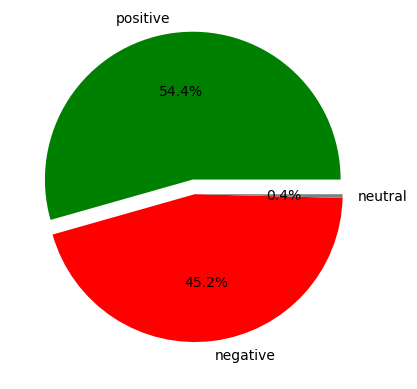

In [5]:
# compute sentiment score percentages
sentiment_type_percentages = sentiment_analysis_df['sentiment_type'].value_counts(normalize=True) * 100

# create pie chart to visualise the percentages
fig, ax = plt.subplots()
ax.pie(
    sentiment_type_percentages,
    labels=sentiment_type_percentages.index, 
    colors=['green', 'red', 'grey'], 
    explode=[0.1, 0, 0], 
    autopct='%1.1f%%'
    )

plt.show()

In [6]:
#Save new data to a csv
sentiment_analysis_df.to_csv(r"C:\Users\HP\Documents\Projects\British_airways\data\Cleaned_BA_reviews.csv")

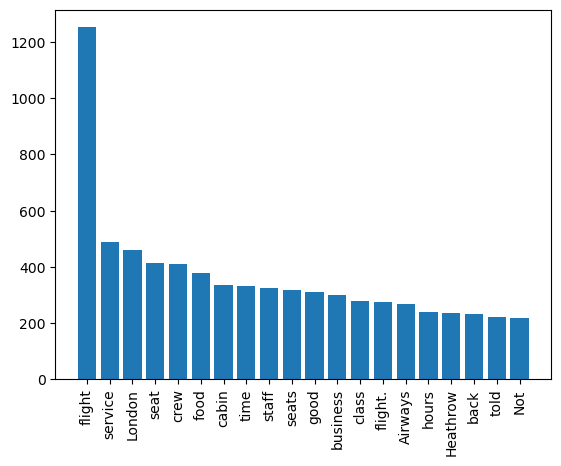

In [12]:
# An attempt to capture popular opinions of customers 

# Get reviews from the sentiment_analysis_df dataframe 
reviews = sentiment_analysis_df['reviews']

# Convert reviews to a list (of words)
words = []
for review in reviews:
    words.extend(review.split())

# Removing stop words
stopwords = nltk.corpus.stopwords.words('english')
key_words = [word for word in words if word not in stopwords and word.lower() not in ['i', 'the','would','one','get','-', 'we', 'us', 'could', 'ba', 'british']]

# Get top 20 most used key words
word_counts = Counter(key_words)
top_20_words = word_counts.most_common(20)

# Get the label(x) and values(y) axis for the histogram
x, y = zip(*top_20_words)

# Create the bar graph
plt.bar(x, y)

# Set the x-axis labels to be vertical
plt.xticks(rotation=90)

#Display the plot
plt.show()

### Key topics

The Bar graph above suggests that customers have things to say about the  “flight”, “service”, “London” and “seat”, "crew". Further analysis should unveil additional insights


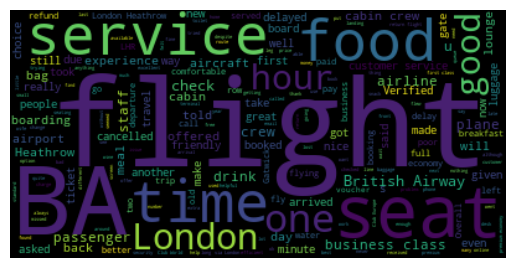

In [10]:
# Import the libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Generate wordcloud
wordcloud = WordCloud(random_state=42).generate(' '.join(sentiment_analysis_df['reviews']))

# visualise wordcloud
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show()